<a href="https://colab.research.google.com/github/Yyijo/shopee_ETL/blob/main/shopee_shampoo_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests

import numpy as np
import pandas as pd

In [ ]:
namelist=[]
historical_sold_list=[]
liked_count_list=[]
brand_list=[]
price_min_list=[]
price_max_list=[]
has_lowest_price_guarantee_list=[]
discount_list=[]
rating_star_list=[]
freeshipping_list=[]
shoplocation_list=[]

def main(shampoo, items_number=200):
    
    url = "https://shopee.com.my/api/v4/search/search_items"

    params = {
        "by": "relevancy",
        "keyword": shampoo,
        "limit": 100,  # default value at start
        "newest": 0,   # default value at start
        "order": "desc",
        "page_type": "search",
        "scenario": "PAGE_GLOBAL_SEARCH",
        "version": "2"
    }
    
    for offset in range(0, items_number, 100):

        #print('\n--- offset:', offset, '---\n')

        params["newest"] = offset   # other parameters are the same
        
        limit = items_number - offset
        if limit < 100:
            params["limit"] = limit
        
        r = requests.get(url, params=params)
        data = r.json()    

        print('>> items number in data:', len(data['items']), '\n')
        
        for number, item in enumerate(data['items']):

            #print('number:', offset+number+1)
            
            basic = item['item_basic']
            
            '''print('keys:', basic.keys())
            for key, value in basic.items():
                print(f"{key}: {value}")'''
            
            # NAME
            name = basic['name']
            #name = basic.get('name', '- unknown -')  # safer if `name` may not exists in `data`
            #print("Name:", name)
            namelist.append(name)

            #SOLD
            historical_sold_list.append(basic['historical_sold'])

            #FAVOURITE
            liked_count_list.append(basic['liked_count'])

        
            # BRAND
            #brand = basic['brand']
            brand = basic.get('brand')  # safer if `brand` may not exists in `data`
            if brand is None:
                brand_list.append('NaN')
            else:
                brand_list.append(brand)

            #PRICE_MIN
            price_min_list.append(basic.get('price_min'))

            #PRICE_MAX
            price_max_list.append(basic.get('price_max'))

            #DISCOUNT
            discount=basic.get('discount')
            if discount is None:
              discount_list.append('0%')
            else:
              discount_list.append(discount)

            #LOWEST PRICE GUARANTEE
            has_lowest_price_guarantee_list.append(basic['has_lowest_price_guarantee'])

            #RATING STAR
            rating_star_list.append(basic['item_rating']['rating_star'])

            #FREE SHIPPING
            freeshipping_list.append(basic['show_free_shipping'])
            
            #SHOPLOCATION
            shoplocation_list.append(basic['shop_location'])

            #print('---')

          
# --- main ---

main("shampoo")
#main("make-up", 60)
#main("make-up", 270)


>> items number in data: 100 

>> items number in data: 100 



In [ ]:
df = pd.DataFrame({'Name':namelist ,
                   'No of Sold':historical_sold_list, 
                   'Favourite':liked_count_list, 
                   'Brand':brand_list,
                   'Price Min(RM)':price_min_list,
                   'Price Max(RM)':price_max_list,
                   'Lowest Price Guarantee':has_lowest_price_guarantee_list,
                   'Discount(%)':discount_list,
                   'Rating':rating_star_list,
                   'Free Shipping':freeshipping_list,
                   'ShopLocation':shoplocation_list})

In [ ]:
df.head(5)

,Name,No of Sold,Favourite,Brand,Price Min(RM),Price Max(RM),Lowest Price Guarantee,Discount(%),Rating,Free Shipping,ShopLocation
0,MHO GINGER Hair Fall Shampoo+Conditioner (1000...,7097,2837,No Brand,1000000,2000000,True,0%,4.934963,False,Perak
1,[ReadyStock] Heads Professional Paris Shampoo ...,3549,1641,,2600000,7800000,False,65%,4.969199,False,Kuala Lumpur
2,Sunsilk Hair Shampoo Conditioner Soft Smooth M...,28325,2792,Sunsilk,1530000,1550000,True,1%,4.948681,False,Perak
3,*GVC* Good Virtues Co. Shampoo 300ml / 700ml,1989,474,Good Virtues Co.,1199000,1899000,True,29%,4.896482,True,Johor
4,Tresemme Hair Fall Control Shampoo 670ml,3844,588,0,3049000,3049000,True,14%,4.949799,True,Selangor


In [ ]:
len(df)

200

In [ ]:
df.dtypes

Name                       object
No of Sold                  int64
Favourite                   int64
Brand                      object
Price Min(RM)               int64
Price Max(RM)               int64
Lowest Price Guarantee       bool
Discount(%)                object
Rating                    float64
Free Shipping                bool
ShopLocation               object
dtype: object

**Data Cleaning for Price**

In [ ]:
df["Price Min(RM)"]=df['Price Min(RM)']/100000
df["Price Max(RM)"]=df['Price Max(RM)']/100000

**Data Cleaning for Brand**

In [ ]:
df['Brand'].unique()

array(['No Brand', '', 'Sunsilk', 'Good Virtues Co.', '0', 'NaN',
       'Some By Mi', 'Pantene', 'Kerasys', 'Rejoice', "Ka'fen", 'Grafen',
       'Evas', 'Schwarzkopf', 'Tresemme', 'Eziclean', 'Kundal',
       "L'Oreal Paris", "L'occitane", 'Nature Republic', 'Mise En Scene',
       'QS', 'modos', 'Nixoderm', 'SO SILVER', 'Dove', 'Good Virtues Co',
       'Hermoso Professional', 'Hers Professional', 'Shea Moisture',
       'Cantu', 'Legitime', 'Clear Men', 'Taiwan Collection',
       'CAR DETAILER', 'Herbal Essences', 'Loreal Professionnel',
       'Mokeru', 'Shu Shu Uu', 'Clear', 'Midori Professional',
       'Ginger King', 'Hope Julia', 'Selsun Blue', 'Adolph (阿道夫)',
       'BZU BZU', 'Dexe', 'iLife', 'Labbell', 'SheaMoisture', 'OEM',
       'Amino Mason', 'Alpecin', 'Aisan Top Team', 'Moist Diane',
       'Spaklean', 'Applecrumby & Fish', 'UNI', "IVE'S", 'Wowo (蜗蜗)',
       '360 Haircare', 'Nunature', 'Aromatica', 'Wowo', 'The Olive Tree',
       'Olaplex'], dtype=object)

In [ ]:
df['Brand'] = df['Brand'].replace({'No Brand':'NaN', '0': 'NaN', '': 'NaN', 'None':'NaN'})

In [ ]:
df['Brand'].unique()

array(['NaN', 'Sunsilk', 'Good Virtues Co.', 'Some By Mi', 'Pantene',
       'Kerasys', 'Rejoice', "Ka'fen", 'Grafen', 'Evas', 'Schwarzkopf',
       'Tresemme', 'Eziclean', 'Kundal', "L'Oreal Paris", "L'occitane",
       'Nature Republic', 'Mise En Scene', 'QS', 'modos', 'Nixoderm',
       'SO SILVER', 'Dove', 'Good Virtues Co', 'Hermoso Professional',
       'Hers Professional', 'Shea Moisture', 'Cantu', 'Legitime',
       'Clear Men', 'Taiwan Collection', 'CAR DETAILER',
       'Herbal Essences', 'Loreal Professionnel', 'Mokeru', 'Shu Shu Uu',
       'Clear', 'Midori Professional', 'Ginger King', 'Hope Julia',
       'Selsun Blue', 'Adolph (阿道夫)', 'BZU BZU', 'Dexe', 'iLife',
       'Labbell', 'SheaMoisture', 'OEM', 'Amino Mason', 'Alpecin',
       'Aisan Top Team', 'Moist Diane', 'Spaklean', 'Applecrumby & Fish',
       'UNI', "IVE'S", 'Wowo (蜗蜗)', '360 Haircare', 'Nunature',
       'Aromatica', 'Wowo', 'The Olive Tree', 'Olaplex'], dtype=object)

**Data Cleaning for Discount**

In [ ]:
df["Discount(%)"] = df['Discount(%)'].replace({'%': ''}, regex=True).map(pd.eval).astype(int)

**Data Cleaning for Rating**

In [ ]:
df['Rating'] = df['Rating'].round(2)

**Data Categorising for Shop Location**

In [ ]:
df['ShopLocation'].unique()

array(['Perak', 'Kuala Lumpur', 'Johor', 'Selangor', 'Penang', 'Kedah',
       'Korea', 'Negeri Sembilan', 'Pahang', 'Melaka', 'Indonesia',
       'Taiwan', 'Putrajaya', 'Kelantan', 'Terengganu'], dtype=object)

In [ ]:
df['ShopLocationCategory']='Local'
df.loc[df['ShopLocation'] == 'Korea', 'ShopLocationCategory'] = 'Overseas'
df.loc[df['ShopLocation'] == 'Vietnam', 'ShopLocationCategory'] = 'Overseas'
df.loc[df['ShopLocation'] == 'Mainland China', 'ShopLocationCategory'] = 'Overseas'
df.loc[df['ShopLocation'] == 'Taiwan', 'ShopLocationCategory'] = 'Overseas'

In [ ]:
df.head(10)

,Name,No of Sold,Favourite,Brand,Price Min(RM),Price Max(RM),Lowest Price Guarantee,Discount(%),Rating,Free Shipping,ShopLocation,ShopLocationCategory
0,MHO GINGER Hair Fall Shampoo+Conditioner (1000...,7097,2837,NaN,10.00,20.00,True,0,4.93,False,Perak,Local
1,[ReadyStock] Heads Professional Paris Shampoo ...,3549,1641,NaN,26.00,78.00,False,65,4.97,False,Kuala Lumpur,Local
2,Sunsilk Hair Shampoo Conditioner Soft Smooth M...,28325,2792,Sunsilk,15.30,15.50,True,1,4.95,False,Perak,Local
3,*GVC* Good Virtues Co. Shampoo 300ml / 700ml,1989,474,Good Virtues Co.,11.99,18.99,True,29,4.90,True,Johor,Local
4,Tresemme Hair Fall Control Shampoo 670ml,3844,588,NaN,30.49,30.49,True,14,4.95,True,Selangor,Local
5,🔥 BEST SELLER 🔥 Biotin PLUS Hair Growth + Hair...,72,37,NaN,118.90,282.50,False,21,5.00,False,Selangor,Local
6,MOIST DIANE Extra Volume Scalp Shampoo 450ml,4587,2021,NaN,27.96,27.96,True,15,4.94,False,Selangor,Local
7,Moist Diane Scalp Smooth Straight/Damage Repai...,6925,2204,NaN,24.90,36.90,True,24,4.94,False,Penang,Local
8,TRESemme Shampoo 340ml Keratin/ Hair Fall / Sc...,6236,1944,NaN,13.90,13.90,False,26,4.97,False,Kedah,Local
9,BIOTIN PLUS DHT Blocker Hair Growth Shampoo EL...,65,36,NaN,118.90,230.90,False,20,5.00,False,Selangor,Local


# Removing outliers

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#define a function to plot boxplot
def plot(df,col):
    plt.figure(figsize=(20,8))
    #histogram
    plt.subplot(1,2,1)
    plt.hist(df[col],alpha=0.5)

    #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(df[col])
    plt.show()
    

**Data Cleaning & Visualisation for Number of sold**



In [ ]:
df['No of Sold'].describe()

count      200.000000
mean      2193.250000
std       3545.258924
min          0.000000
25%        399.750000
50%        885.000000
75%       2339.250000
max      28325.000000
Name: No of Sold, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


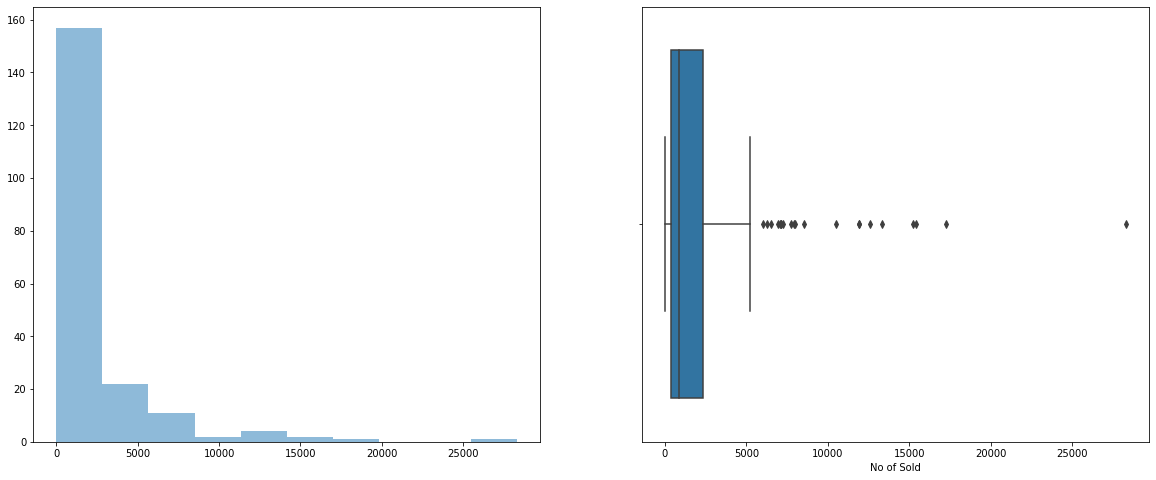

In [ ]:
plot(df,'No of Sold')

In [ ]:
def find_boundaries(df, col):
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  lower_boundary=Q1- 1.5*IQR
  upper_boundary=Q3+ 1.5*IQR

  return lower_boundary, upper_boundary

In [ ]:
lower_bound, upper_bound = find_boundaries(df,'No of Sold')
print('lower boundary: ',lower_bound)
print('upper boundary: ', upper_bound)

lower boundary:  -2509.5
upper boundary:  5248.5


In [ ]:
#replace outliers with lower boundary / upper boundary
df['No of Sold']=np.where(df['No of Sold']>upper_bound, upper_bound,
                          np.where(df['No of Sold']<lower_bound, lower_bound, df['No of Sold']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


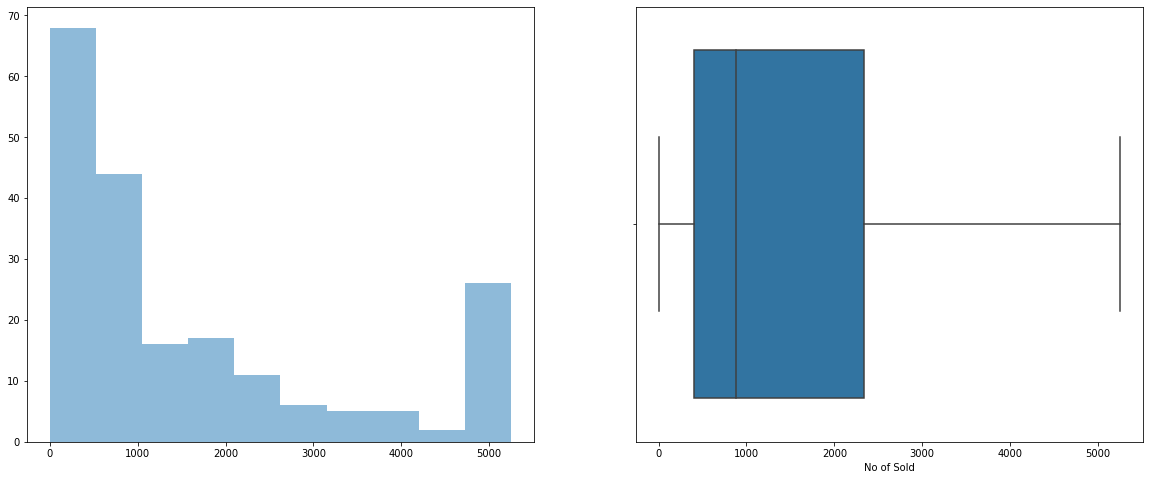

In [ ]:
plot(df,'No of Sold')

**Data Cleaning & Visualisation for Favourite**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


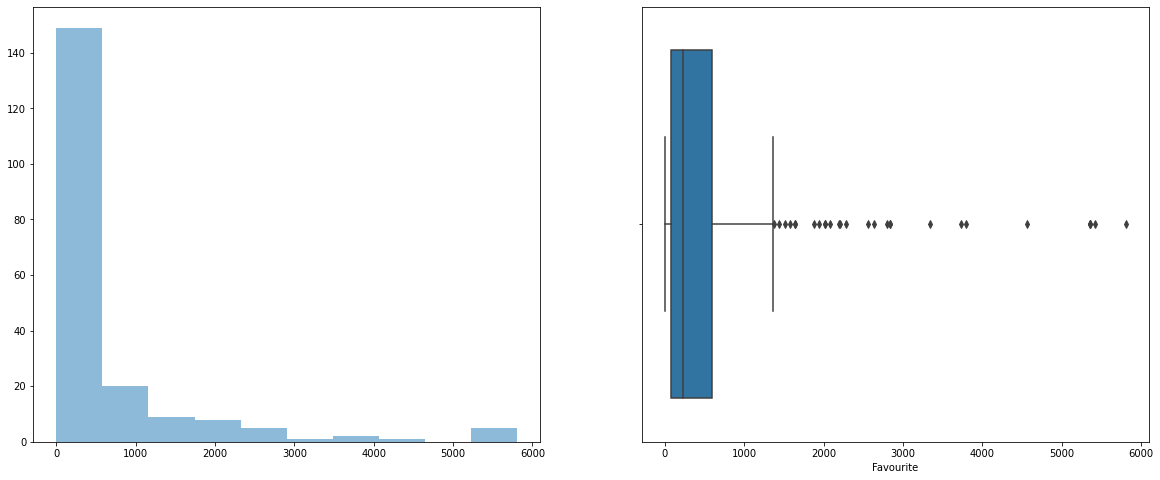

In [ ]:
plot(df,'Favourite')

In [ ]:
lower_bound, upper_bound = find_boundaries(df,'Favourite')
print('lower boundary: ',lower_bound)
print('upper boundary: ', upper_bound)

lower boundary:  -700.875
upper boundary:  1368.125


In [ ]:
#replace outliers with lower or upper boundary
df['Favourite']=np.where(df['Favourite']>upper_bound, upper_bound,
                          np.where(df['Favourite']<lower_bound, lower_bound, df['Favourite']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


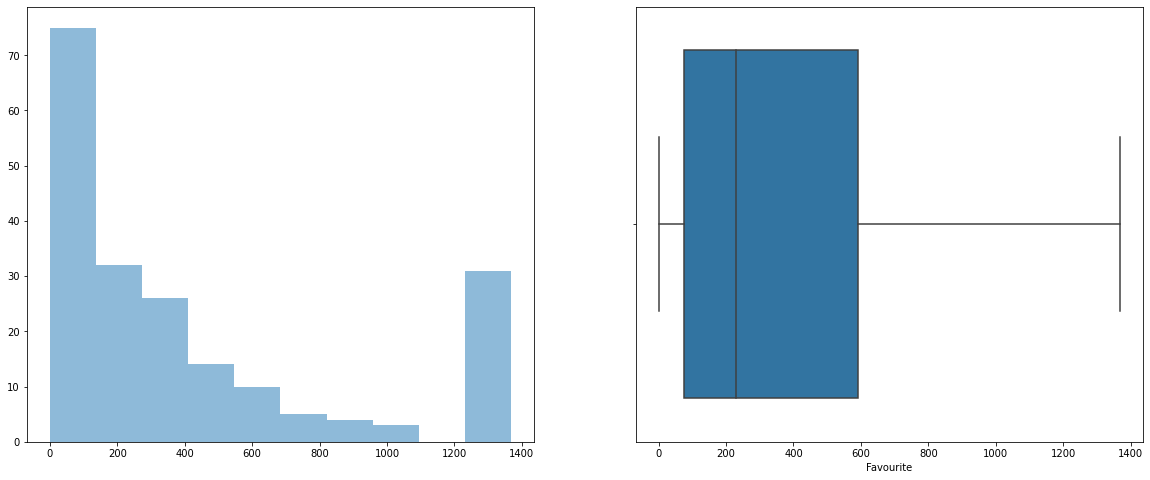

In [ ]:
plot(df,'Favourite')

[link text](https://)**Data Cleaning & Visualisation for Rating**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


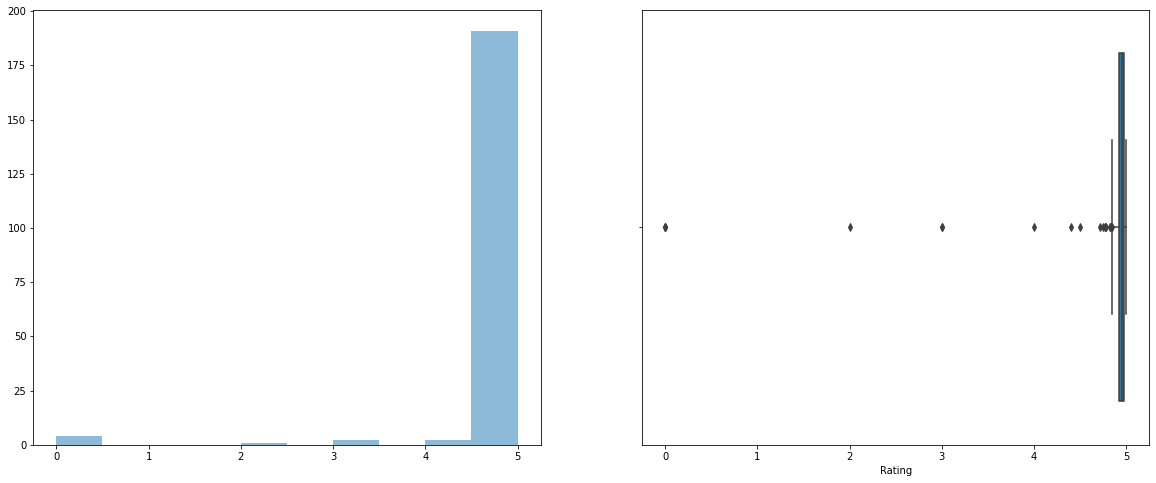

In [ ]:
plot(df,'Rating')

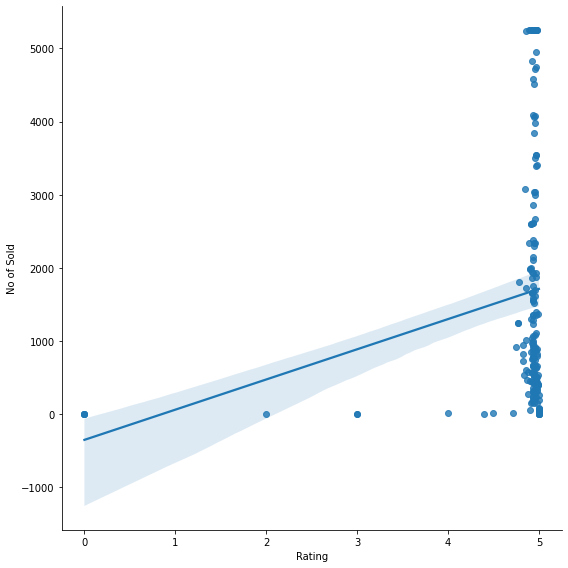

In [ ]:
#scatter plot sold & rating
#weak/no association 
sns.lmplot(y='No of Sold',x='Rating',data=df,fit_reg=True, height=8)

In [ ]:
lower_bound, upper_bound = find_boundaries(df,'Rating')
print('lower boundary: ',lower_bound)
print('upper boundary: ', upper_bound)

#replace outliers with lower/upper boundary
df['Rating']=np.where(df['Rating']>upper_bound, upper_bound,
                          np.where(df['Rating']<lower_bound, lower_bound, df['Rating']))

lower boundary:  4.845000000000001
upper boundary:  5.045


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


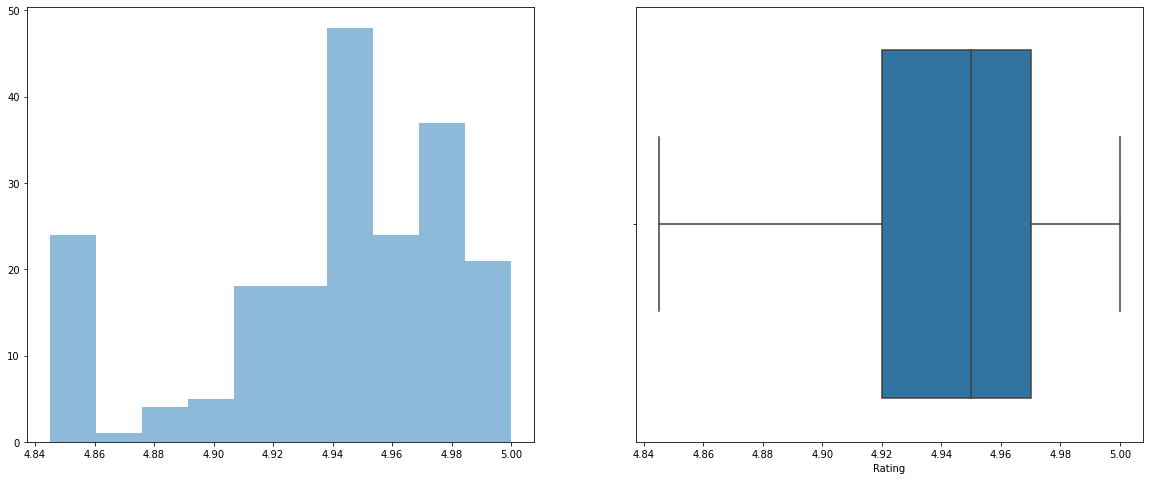

In [ ]:
plot(df, 'Rating')

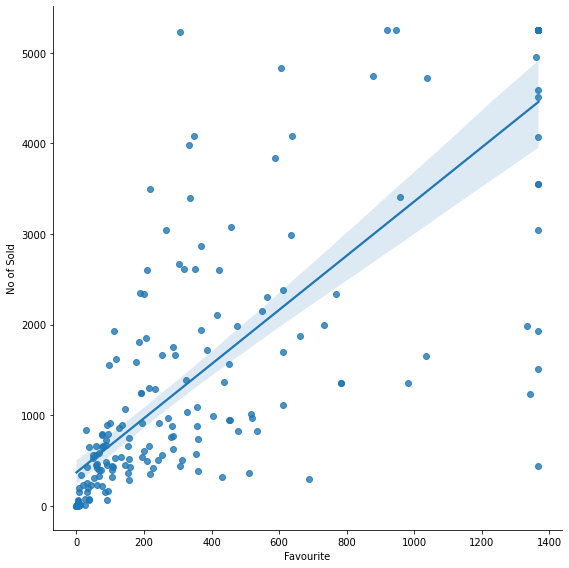

In [ ]:
#scatter plot sold & fav 
#showing positive association 
sns.lmplot(y='No of Sold',x='Favourite',data=df,fit_reg=True, height=8)

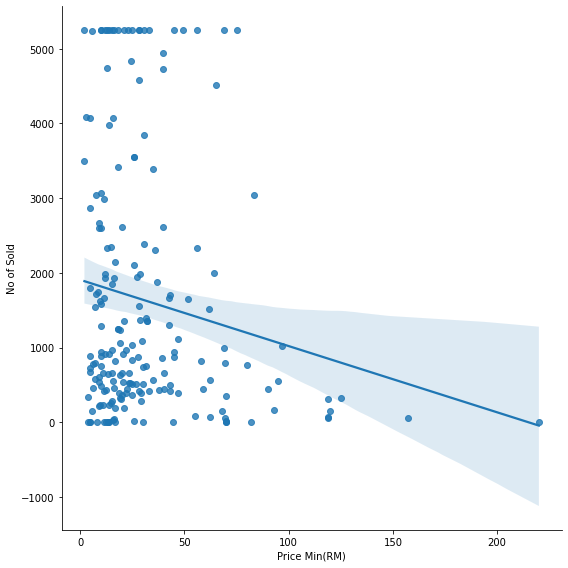

In [ ]:
#scatter plot sold & price min
#showing negative association 
sns.lmplot(y='No of Sold',x='Price Min(RM)',data=df,fit_reg=True, height=8)

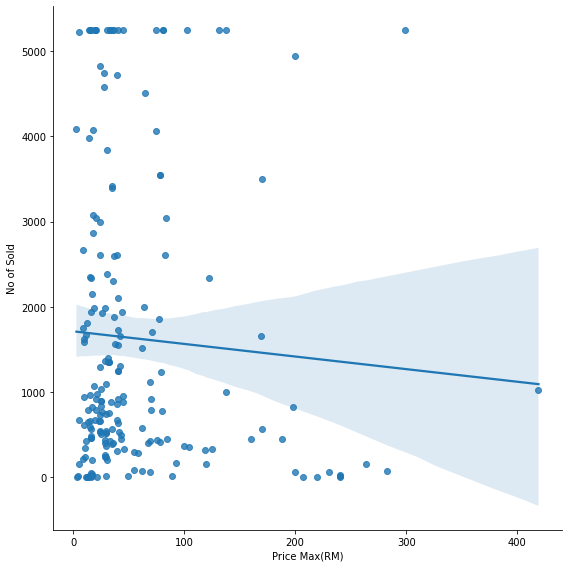

In [ ]:
#scatter plot sold & price max 
#showing negative association 
sns.lmplot(y='No of Sold',x='Price Max(RM)',data=df,fit_reg=True, height=8)

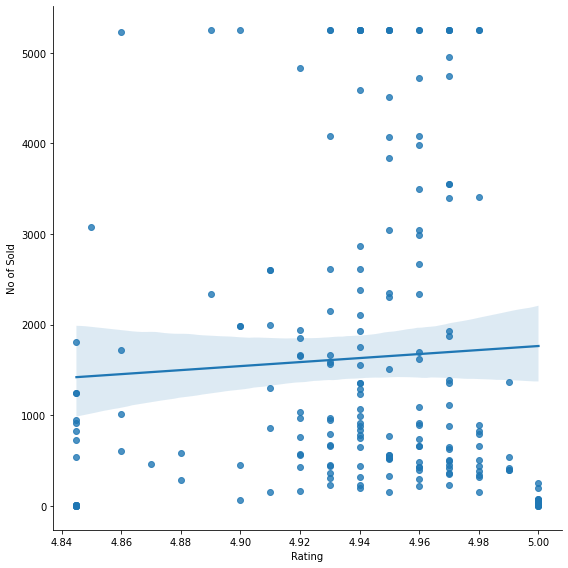

In [ ]:
#scatter plot sold & rating
#weak/no association 
sns.lmplot(y='No of Sold',x='Rating',data=df,fit_reg=True, height=8)

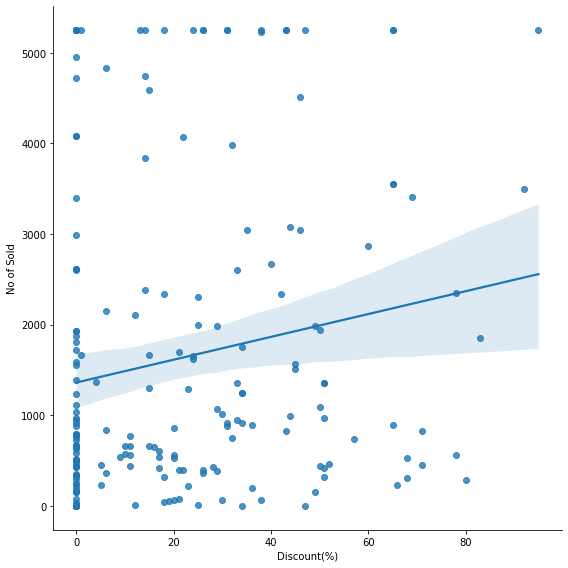

In [ ]:
#scatter plot sold & discount
#weak positive association 
sns.lmplot(y='No of Sold',x='Discount(%)',data=df,fit_reg=True, height=8)

**Free Shipping**

In [ ]:
df['row_num'] = df.reset_index().index

In [ ]:
df_freeshipping_t=df.loc[df['Free Shipping'] == True]
df_freeshipping_f=df.loc[df['Free Shipping'] == False]

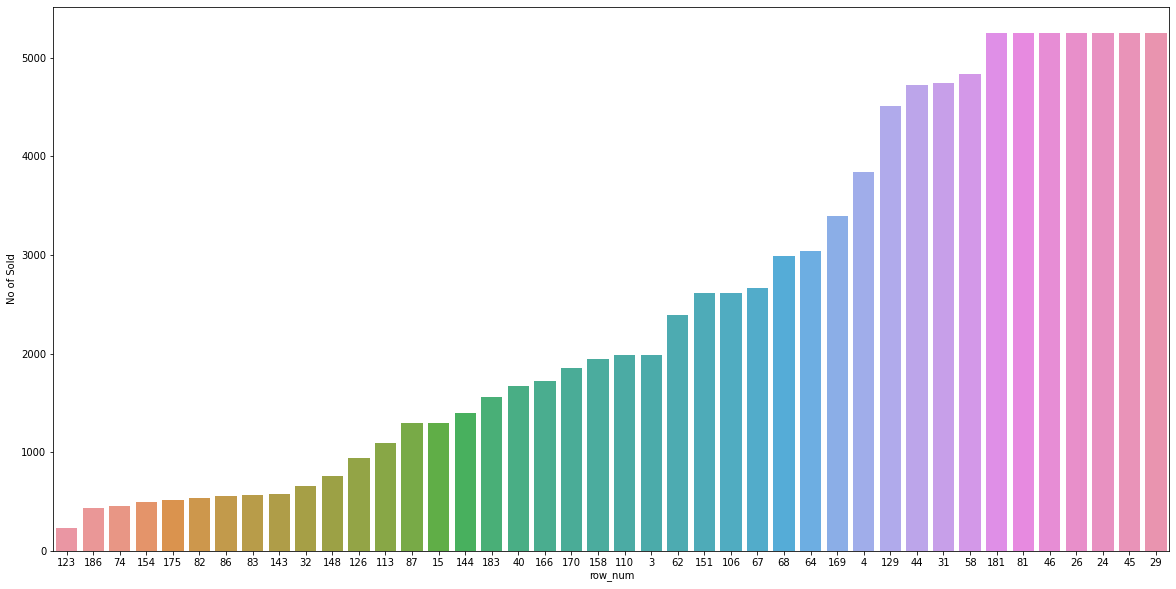

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='row_num',
            y='No of Sold', 
            data=df_freeshipping_t,
            order=df_freeshipping_t.sort_values('No of Sold').row_num)

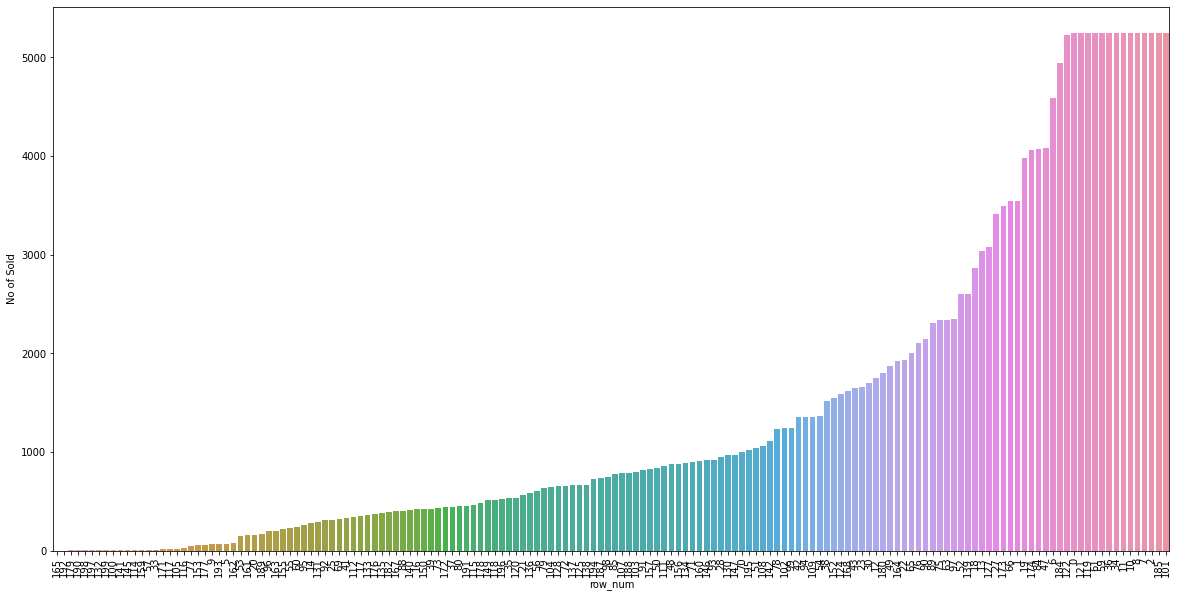

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.barplot(x='row_num',
            y='No of Sold', 
            data=df_freeshipping_f,
            order=df_freeshipping_f.sort_values('No of Sold').row_num)


**Shop Location**

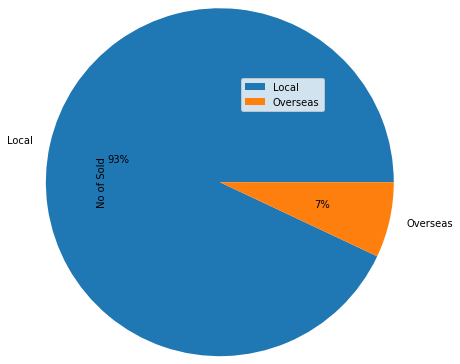

In [ ]:
df.groupby(['ShopLocationCategory']).sum().plot(kind='pie', 
                                                y='No of Sold', 
                                                autopct='%1.0f%%'
                                                ,radius=2
                                                )

#total number of sold for local seller is higher then overseas seller

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38463 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36947 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22827 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 34583 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 38463 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 36947 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 22827 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 34583 missing from current font.
  font.set_text(s, 0, flags=flags)


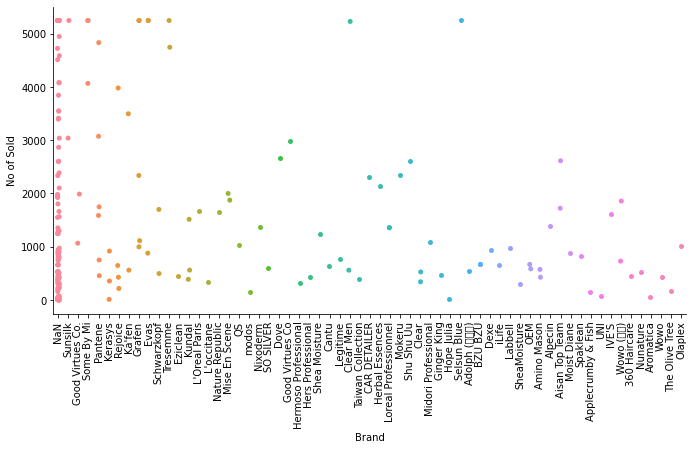

In [ ]:
g= sns.catplot(x="Brand", y="No of Sold", data=df,height=5, aspect=2)
g.set_xticklabels(rotation = 90)

In [ ]:
df

,Name,No of Sold,Favourite,Brand,Price Min(RM),Price Max(RM),Lowest Price Guarantee,Discount(%),Rating,Free Shipping,ShopLocation,ShopLocationCategory,row_num
0,MHO GINGER Hair Fall Shampoo+Conditioner (1000...,5248.5,1368.125,NaN,10.00,20.00,True,0,4.930,False,Perak,Local,0
1,[ReadyStock] Heads Professional Paris Shampoo ...,3549.0,1368.125,NaN,26.00,78.00,False,65,4.970,False,Kuala Lumpur,Local,1
2,Sunsilk Hair Shampoo Conditioner Soft Smooth M...,5248.5,1368.125,Sunsilk,15.30,15.50,True,1,4.950,False,Perak,Local,2
3,*GVC* Good Virtues Co. Shampoo 300ml / 700ml,1989.0,474.000,Good Virtues Co.,11.99,18.99,True,29,4.900,True,Johor,Local,3
4,Tresemme Hair Fall Control Shampoo 670ml,3844.0,588.000,NaN,30.49,30.49,True,14,4.950,True,Selangor,Local,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,(Original) Olaplex No3 No4 No5 No6 No7/Treatme...,1018.0,518.000,Olaplex,96.88,419.20,False,30,4.860,False,Kuala Lumpur,Local,195
196,CLEAR Women Anti Dandruff Scalp Care Ice Cool ...,526.0,50.000,Clear,23.92,23.92,False,20,4.950,False,Selangor,Local,196
197,[100% ORIGINAL FROM HQ] FEODORA Shampoo & Cond...,3.0,4.000,NaN,70.00,240.00,False,0,5.000,False,Selangor,Local,197
198,Himalaya Anti Hair Fall Shampo / Shampoo Anti ...,2.0,1.000,NaN,13.30,13.30,False,0,4.845,False,Selangor,Local,198


In [ ]:
df.to_csv('project.csv', index=False)